In [1]:
import numpy as np
import pandas as pd

# Reading .csv file

In [315]:
data = pd.read_csv('E:/BITS Pilani/First Semester/G507 - Programming for Analytics - Tirumalsety Ravendranath/Code/Programming-for-Analytics--MPBA-G507-main/Assignments/Python Assignments/01 Data Cleaning/ipl2021dirtydataset.csv',index_col=None, header=0)
data.head(5)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,1254058,1,0,1,RG Sharma,CA Lynn,Mohammed Siraj,2,0,2,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore
1,1254058,1,0,2,RG Sharma,CA Lynn,Mohammed Siraj,0,0,0,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore
2,1254058,1,0,3,RG Sharma,CA Lynn,Mohammed Siraj,0,0,0,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore
3,1254058,1,0,4,RG Sharma,CA Lynn,Mohammed Siraj,2,0,2,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore
4,1254058,1,0,5,RG Sharma,CA Lynn,Mohammed Siraj,0,0,0,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore


## Drop id column

In [316]:
data.drop(["id"],axis = 1,inplace = True)

## Getting Unique values in each required index

In [317]:
# for i in list(data.columns):
#     print(i,": ",set(data[i]))

req_index = [0,1,2,6,7,8,9,10,11,14,15,16]
req_set_list = [data.columns[i] for i in req_index]
# print(req_set_list)

for i in req_set_list:
    print(i,": ",set(data[i]))

inning :  {1, 2}
over :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
ball :  {1, 2, 3, 4, 5, 6, 7, 8}
batsman_runs :  {0, 1, 2, 3, 4, 6, 16, 22}
extra_runs :  {0, 1, 4, 5}
total_runs :  {0, 1, 2, 3, 4, 100, 6, 5, 7, 67}
non_boundary :  {0}
is_wicket :  {0, 1, 2, 4, 5, 7, 8, 9}
dismissal_kind :  {nan, 'caught and bowled', 'Not Applicable', 'caught', 'lbw', 'bowled', 'run out'}
extras_type :  {nan, 'wides', 'legbyes', 'noballs'}
batting_team :  {'Royal Challengers Bangalore', 'DC', 'RCB', 'CSK', 'Kolkata Knight Riders', 'csk', 'Mumbai Indians', 'Delhi Capitals', 'Chennai Super Kings', 'MI'}
bowling_team :  {'Sunrisers Hyderabad', 'SH', 'DC', 'RCB', 'MI', 'CSK', 'Delhi Capitals', 'Mumbai Indians', 'csk', 'Chennai Super Kings', 'mi', 'Royal Challengers Bangalore'}


# Data Cleaning

## Shoretening team names

### .replace() method

#### ref: https://pythonguides.com/pandas-replace-multiple-values/

In [318]:
data.replace({"batting_team":{
    'Royal Challengers Bangalore':'RCB',
    'Kolkata Knight Riders':'KKR',
    'csk':'CSK',
    'Mumbai Indians':'MI',
    'Delhi Capitals':'DC',
    'Chennai Super Kings':'CSK',
},
             "bowling_team":{
                 'Sunrisers Hyderabad':'SRH',
                 'SH':'SRH',
                 'Delhi Capitals':'DC',
                 'Mumbai Indians':'MI',
                 'csk':'CSK',
                 'Chennai Super Kings':'CSK',
                 'mi':'MI',
                 'Royal Challengers Bangalore':'RCB'
             }},inplace = True)

print(set(data.batting_team),set(data.bowling_team),sep="\n")

{'DC', 'KKR', 'RCB', 'CSK', 'MI'}
{'DC', 'RCB', 'CSK', 'SRH', 'MI'}


## Getting matches between X vs Y

In [319]:
data["teams"] = data.batting_team + " vs " + data.bowling_team
data.head(5)
set(data.teams)

{'CSK vs DC', 'DC vs CSK', 'KKR vs SRH', 'MI vs RCB', 'RCB vs MI'}

## Updating required index

In [321]:
# for i in list(data.columns):
#     print(i,": ",set(data[i]))

req_index_2 = req_index + [17]
print(req_index_2)
req_set_list_2 = [data.columns[i] for i in req_index_2]
print(req_set_list_2)

[0, 1, 2, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17]
['inning', 'over', 'ball', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket', 'dismissal_kind', 'extras_type', 'batting_team', 'bowling_team', 'teams']


## Function to check unique values

In [322]:
def check(frame):
    req_set_list_2 = [frame.columns[i] for i in req_index_2]
    for i in req_set_list_2:
        print(i,": ",set(frame[i]))
check(data)

def unique(frame,a):
    print(a,": ",set(frame[a]))
    return set(frame[a])

inning :  {1, 2}
over :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
ball :  {1, 2, 3, 4, 5, 6, 7, 8}
batsman_runs :  {0, 1, 2, 3, 4, 6, 16, 22}
extra_runs :  {0, 1, 4, 5}
total_runs :  {0, 1, 2, 3, 4, 100, 6, 5, 7, 67}
non_boundary :  {0}
is_wicket :  {0, 1, 2, 4, 5, 7, 8, 9}
dismissal_kind :  {nan, 'caught and bowled', 'Not Applicable', 'caught', 'lbw', 'bowled', 'run out'}
extras_type :  {nan, 'wides', 'legbyes', 'noballs'}
batting_team :  {'DC', 'KKR', 'RCB', 'CSK', 'MI'}
bowling_team :  {'DC', 'RCB', 'CSK', 'SRH', 'MI'}
teams :  {'RCB vs MI', 'MI vs RCB', 'DC vs CSK', 'CSK vs DC', 'KKR vs SRH'}


## Handling batsman_runs

In [323]:
data.batsman_runs.where(~(data.batsman_runs > 6),other = 0,inplace = True)
# or (data.batsman_runs > 6) .where(condition, other values are replaced by)
unique(data,"batsman_runs")

batsman_runs :  {0, 1, 2, 3, 4, 6}


{0, 1, 2, 3, 4, 6}

## Handling total_runs

#### ref: https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842/2

In [324]:
# total runs
total = data.batsman_runs + data.extra_runs
# print(total)
# type(total)

total_place = list(data.columns).index("total_runs")
data.insert(total_place, "total", total)

# other way is to name the new series as total_runs and give argument allow_duplicates = False
# this gets rid of next step

### Drop total_runs column

In [325]:
''' .drop() method to remove rows and columns
axis=0 == axis="rows" & axis=1 == axis="columns"
when removing rows drop(0),axis=0
when removing columns drop([1]),axis=1
'''

data.drop(["total_runs"], axis = 1, inplace = True)

In [326]:
unique(data,"total")

total :  {0, 1, 2, 3, 4, 5, 6, 7}


{0, 1, 2, 3, 4, 5, 6, 7}

In [327]:
check(data)

inning :  {1, 2}
over :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
ball :  {1, 2, 3, 4, 5, 6, 7, 8}
batsman_runs :  {0, 1, 2, 3, 4, 6}
extra_runs :  {0, 1, 4, 5}
total :  {0, 1, 2, 3, 4, 5, 6, 7}
non_boundary :  {0}
is_wicket :  {0, 1, 2, 4, 5, 7, 8, 9}
dismissal_kind :  {nan, 'caught and bowled', 'Not Applicable', 'caught', 'lbw', 'bowled', 'run out'}
extras_type :  {nan, 'wides', 'legbyes', 'noballs'}
batting_team :  {'DC', 'KKR', 'RCB', 'CSK', 'MI'}
bowling_team :  {'DC', 'RCB', 'CSK', 'SRH', 'MI'}
teams :  {'RCB vs MI', 'MI vs RCB', 'DC vs CSK', 'CSK vs DC', 'KKR vs SRH'}


## Handling non_boundary

### Drop non-boundary

In [328]:
data.drop(["non_boundary"], axis = 1, inplace = True)

### Update the required index 2

In [329]:
req_index_2 = [0,1,2,6,7,8,9,10,13,14,15,16]

In [330]:
check(data)

inning :  {1, 2}
over :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
ball :  {1, 2, 3, 4, 5, 6, 7, 8}
batsman_runs :  {0, 1, 2, 3, 4, 6}
extra_runs :  {0, 1, 4, 5}
total :  {0, 1, 2, 3, 4, 5, 6, 7}
is_wicket :  {0, 1, 2, 4, 5, 7, 8, 9}
dismissal_kind :  {nan, 'caught and bowled', 'Not Applicable', 'caught', 'lbw', 'bowled', 'run out'}
extras_type :  {nan, 'wides', 'legbyes', 'noballs'}
batting_team :  {'DC', 'KKR', 'RCB', 'CSK', 'MI'}
bowling_team :  {'DC', 'RCB', 'CSK', 'SRH', 'MI'}
teams :  {'RCB vs MI', 'MI vs RCB', 'DC vs CSK', 'CSK vs DC', 'KKR vs SRH'}


## Handling empty values

### Function to print number of missing values in each column

#### ref: https://www.geeksforgeeks.org/count-nan-or-missing-values-in-pandas-dataframe/

In [331]:
def countNull(column):
    return data[column].isnull().sum()

# print nulls present in each column
    
def checkNull():
    for i in list(data.columns):
        print(i,": ",countNull(i))
checkNull()

inning :  0
over :  0
ball :  0
batsman :  0
non_striker :  0
bowler :  0
batsman_runs :  0
extra_runs :  0
total :  0
is_wicket :  0
dismissal_kind :  464
player_dismissed :  455
fielder :  483
extras_type :  476
batting_team :  0
bowling_team :  0
teams :  0


In [332]:
check(data)

inning :  {1, 2}
over :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
ball :  {1, 2, 3, 4, 5, 6, 7, 8}
batsman_runs :  {0, 1, 2, 3, 4, 6}
extra_runs :  {0, 1, 4, 5}
total :  {0, 1, 2, 3, 4, 5, 6, 7}
is_wicket :  {0, 1, 2, 4, 5, 7, 8, 9}
dismissal_kind :  {nan, 'caught and bowled', 'Not Applicable', 'caught', 'lbw', 'bowled', 'run out'}
extras_type :  {nan, 'wides', 'legbyes', 'noballs'}
batting_team :  {'DC', 'KKR', 'RCB', 'CSK', 'MI'}
bowling_team :  {'DC', 'RCB', 'CSK', 'SRH', 'MI'}
teams :  {'RCB vs MI', 'MI vs RCB', 'DC vs CSK', 'CSK vs DC', 'KKR vs SRH'}


## Replace empty values

#### https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/
#### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [333]:
na_index = ["dismissal_kind","player_dismissed","fielder","extras_type"]

for i in na_index:
    data[i].fillna("none", inplace = True) # or .replace(np.na, value)

In [335]:
check(data)
# unique(data,na_index[1])
# unique(data,na_index[2])

inning :  {1, 2}
over :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
ball :  {1, 2, 3, 4, 5, 6, 7, 8}
batsman_runs :  {0, 1, 2, 3, 4, 6}
extra_runs :  {0, 1, 4, 5}
total :  {0, 1, 2, 3, 4, 5, 6, 7}
is_wicket :  {0, 1, 2, 4, 5, 7, 8, 9}
dismissal_kind :  {'caught and bowled', 'Not Applicable', 'none', 'caught', 'lbw', 'bowled', 'run out'}
extras_type :  {'wides', 'none', 'legbyes', 'noballs'}
batting_team :  {'DC', 'KKR', 'RCB', 'CSK', 'MI'}
bowling_team :  {'DC', 'RCB', 'CSK', 'SRH', 'MI'}
teams :  {'RCB vs MI', 'MI vs RCB', 'DC vs CSK', 'CSK vs DC', 'KKR vs SRH'}


## Replace 'Not Applicable' with none

In [336]:
data.replace('Not Applicable', 'none', inplace = True)

## Segmenting the matches data

### RCB vs MI

In [337]:
unique(data,"teams")

rcb_vs_mi = data[((data.teams == 'RCB vs MI') | (data.teams == 'MI vs RCB'))] # donot use or operator, pandas considers it ambigous
rcb_vs_mi.head(5)

teams :  {'RCB vs MI', 'MI vs RCB', 'DC vs CSK', 'CSK vs DC', 'KKR vs SRH'}


,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,teams
0,1,0,1,RG Sharma,CA Lynn,Mohammed Siraj,2,0,2,0,none,none,none,none,MI,RCB,MI vs RCB
1,1,0,2,RG Sharma,CA Lynn,Mohammed Siraj,0,0,0,0,none,none,none,none,MI,RCB,MI vs RCB
2,1,0,3,RG Sharma,CA Lynn,Mohammed Siraj,0,0,0,0,none,none,none,none,MI,RCB,MI vs RCB
3,1,0,4,RG Sharma,CA Lynn,Mohammed Siraj,2,0,2,0,none,none,none,none,MI,RCB,MI vs RCB
4,1,0,5,RG Sharma,CA Lynn,Mohammed Siraj,0,0,0,0,none,none,none,none,MI,RCB,MI vs RCB


In [338]:
check(rcb_vs_mi)

inning :  {1, 2}
over :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
ball :  {1, 2, 3, 4, 5, 6, 7, 8}
batsman_runs :  {0, 1, 2, 3, 4, 6}
extra_runs :  {0, 1, 5}
total :  {0, 1, 2, 3, 4, 5, 6}
is_wicket :  {0, 1, 2, 4, 7, 8}
dismissal_kind :  {'caught and bowled', 'none', 'caught', 'lbw', 'bowled', 'run out'}
extras_type :  {'wides', 'none', 'legbyes', 'noballs'}
batting_team :  {'MI', 'RCB'}
bowling_team :  {'MI', 'RCB'}
teams :  {'RCB vs MI', 'MI vs RCB'}


#### Segmenting innings

In [339]:
rcb_vs_mi_1 = rcb_vs_mi[rcb_vs_mi.inning == 1]
rcb_vs_mi_2 = rcb_vs_mi[rcb_vs_mi.inning == 2]

#### Overview of data

In [340]:
# rcb_vs_mi.size
# rcb_vs_mi.shape
# rcb_vs_mi.describe()
# rcb_vs_mi.count() #excludes Nan
# rcb_vs_mi["total"].describe()
print(rcb_vs_mi["total"].sum())
# rcb_vs_mi.corr()

# rcb_vs_mi_1.size
# rcb_vs_mi_1.shape
# rcb_vs_mi_1.describe()
# rcb_vs_mi_1.count() #excludes Nan
# rcb_vs_mi_1["total"].describe()
print(rcb_vs_mi_1["total"].sum())
# rcb_vs_mi_1.corr()

# rcb_vs_mi_2.size
# rcb_vs_mi_2.shape
# rcb_vs_mi_2.describe()
# rcb_vs_mi_2.count() #excludes Nan
# rcb_vs_mi_2["total"].describe()
print(rcb_vs_mi_2["total"].sum())
# rcb_vs_mi_2.corr()

319
159
160


## Method pd.pivot_table()

### Per over runs

#### ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html

In [341]:
rcb_mi_per_over = pd.pivot_table(rcb_vs_mi, values=['total',"batsman_runs"], index=['inning','over',"batsman"], aggfunc=np.sum)
print(rcb_mi_per_over)

                            batsman_runs  total
inning over batsman                            
1      0    RG Sharma                  5      5
       1    CA Lynn                    0      0
            RG Sharma                  1      1
       2    RG Sharma                  6      6
       3    CA Lynn                    5      5
...                                  ...    ...
2      18   AB de Villiers            12     12
            KA Jamieson                0      0
       19   AB de Villiers             2      2
            HV Patel                   4      4
            Mohammed Siraj             0      1

[86 rows x 2 columns]


### CSK vs DC

In [342]:
csk_vs_dc = data[(data.teams == ('CSK vs DC')) | (data.teams == 'DC vs CSK')]

csk_vs_dc_1 = csk_vs_dc[csk_vs_dc.inning == 1]
csk_vs_dc_2 = csk_vs_dc[csk_vs_dc.inning == 2]

# csk_vs_dc.size
# csk_vs_dc.shape
# csk_vs_dc.describe()
# csk_vs_dc.count() #excludes Nan
# csk_vs_dc["total"].describe()
print(csk_vs_dc["total"].sum())
# rcb_vs_mi.corr()

csk_dc_per_over = pd.pivot_table(
    csk_vs_dc, 
    values=['total',"batsman_runs",'extra_runs'], 
    index=['inning','over',"batsman"], 
    aggfunc=np.sum)
print(csk_dc_per_over)

374
                          batsman_runs  extra_runs  total
inning over batsman                                      
1      0    F du Plessis             0           0      0
            RD Gaikwad               4           1      5
       1    F du Plessis             0           0      0
            MM Ali                   0           0      0
            RD Gaikwad               1           1      2
...                                ...         ...    ...
2      16   S Dhawan                 8           1      9
       17   MP Stoinis               6           0      6
            RR Pant                  4           0      4
       18   MP Stoinis               4           0      4
            RR Pant                  4           0      4

[80 rows x 3 columns]


### KKR vs SRH

In [343]:
kkr_vs_srh = data[data.teams == ('KKR vs SRH')]

# kkr_vs_srh.size
# kkr_vs_srh.shape
# kkr_vs_srh.describe()
# kkr_vs_srh.count() #excludes Nan
# kkr_vs_srh["total"].describe()
print(kkr_vs_srh["total"].sum())
# kkr_vs_srh.corr()

kkr_srh_per_over = pd.pivot_table(kkr_vs_srh, values='total', index=['inning','over'], aggfunc=np.sum)
print(kkr_srh_per_over)

9
             total
inning over       
1      0         4
       1         5


In [344]:
len(rcb_vs_mi)+len(csk_vs_dc)+len(kkr_vs_srh)

499

# END

### --------------------------------------------------------------------------------------------------------------------------

# Visualization

In [345]:
from matplotlib import pyplot as plt

x = list(unique(rcb_vs_mi_1,'over'))

over :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


## Grouping data

#### ref: https://towardsdatascience.com/all-pandas-groupby-you-should-know-for-grouping-data-and-performing-operations-2a8ec1327b5

In [346]:
over_group_1 = rcb_vs_mi_1.groupby('over')
over_group_2 = rcb_vs_mi_2.groupby('over')

In [347]:
y = list(over_group_1.total.sum())
z = list(over_group_2.total.sum())

## Bar plot

#### ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

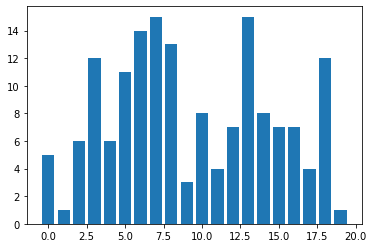

In [348]:
plt.bar(x,y)
plt.show()

## Line plot

#### ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

In [349]:
l = list(over_group_1.total.sum().cumsum())
print(l)
m = list(over_group_2.total.sum().cumsum())

[5, 6, 12, 24, 30, 41, 55, 70, 83, 86, 94, 98, 105, 120, 128, 135, 142, 146, 158, 159]


Text(0.5, 1.0, 'Performance Comparision')

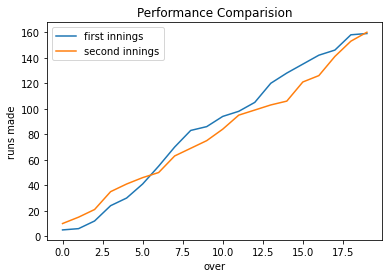

In [350]:
plt.plot(x,l)
plt.plot(x,m)
plt.legend(['first innings','second innings'])
plt.xlabel('over')
plt.ylabel('runs made')
plt.title('Performance Comparision')